In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("white")

# Set working directory
os.chdir('/workspaces/Readmission-Prediction')
print("You set a new current directory:", os.getcwd())

# Load dataset ready for training and test split
df = pd.read_csv("inputs/readmission_dataset/final_df.csv")
print(" Dataset Loaded Successfully")

You set a new current directory: /workspaces/Readmission-Prediction
 Dataset Loaded Successfully


In [3]:
print(f"Dataset Shape: {df.shape}")  
df

Dataset Shape: (25000, 39)


,age,boxcox_time_in_hospital,sqrt_n_procedures,log_n_medications,boxcox_n_outpatient,boxcox_n_inpatient,boxcox_n_emergency,readmitted,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,...,diag_3_Digestive,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory,glucose_test_normal,A1Ctest_normal,change_yes,diabetes_med_yes
0,75,2.052323,1.000000,2.944439,0.181237,0.00000,0.0,0,False,False,...,False,False,False,False,True,False,False,False,False,True
1,75,1.327644,1.414214,2.639057,0.000000,0.00000,0.0,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,55,1.694598,0.000000,2.944439,0.000000,0.00000,0.0,1,False,False,...,False,False,False,False,False,False,False,False,True,True
3,75,1.061558,0.000000,2.564949,0.177665,0.00000,0.0,1,False,False,...,False,False,False,False,False,False,False,False,True,True
4,65,0.678272,0.000000,2.079442,0.000000,0.00000,0.0,0,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,85,2.490224,1.000000,3.433987,0.000000,0.00000,0.0,1,False,False,...,False,False,False,False,False,False,False,True,False,False
24996,85,1.061558,0.000000,3.218876,0.000000,0.00000,0.0,1,False,False,...,False,False,False,False,True,False,False,False,True,True
24997,75,1.694598,0.000000,1.945910,0.000000,0.35868,0.0,1,False,False,...,False,False,False,False,True,False,True,False,False,False
24998,75,1.061558,1.732051,2.772589,0.000000,0.00000,0.0,0,False,True,...,False,False,False,False,True,False,False,False,True,True


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['readmitted'], axis=1),  # Features
    df['readmitted'],  # Target variable
    test_size=0.2,  # 20% for testing
    random_state=101  # Ensures reproducibility
)

print("* Train set:", X_train.shape, y_train.shape, 
      "\n* Test set:", X_test.shape, y_test.shape)


* Train set: (20000, 38) (20000,) 
* Test set: (5000, 38) (5000,)


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

def pipeline_logistic_regression():
    pipeline = Pipeline([
        ("model", LogisticRegression(max_iter=1000, random_state=101))
    ])
    return pipeline

# Create the pipeline
pipeline = pipeline_logistic_regression()

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('model', LogisticRegression(max_iter=1000, random_state=101))])

In [6]:
import pandas as pd

def logistic_regress_coef(model, columns):
    coeff_df = (pd.DataFrame(model.coef_.ravel(), index=columns, columns=['Coefficient'])  
                .sort_values(by='Coefficient', key=abs, ascending=False))  
    print(coeff_df)

model = pipeline.named_steps['model']

# Print coefficients
logistic_regress_coef(model, X_train.columns)

                                          Coefficient
boxcox_n_emergency                           3.092012
boxcox_n_outpatient                          2.281371
boxcox_n_inpatient                           1.974907
diag_3_Missing                              -0.459556
diag_1_Missing                               0.332159
diabetes_med_yes                             0.233756
diag_1_Injury                               -0.208053
diag_2_Digestive                            -0.197354
medical_specialty_Surgery                   -0.187780
diag_2_Injury                               -0.180204
diag_1_Other                                -0.161876
boxcox_time_in_hospital                      0.161155
diag_1_Diabetes                              0.158952
A1Ctest_normal                              -0.146055
diag_1_Musculoskeletal                      -0.132198
medical_specialty_Other                     -0.128404
medical_specialty_InternalMedicine          -0.114838
diag_3_Injury               

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predict probabilities
y_train_probs = pipeline.predict_proba(X_train)[:, 1] 
y_test_probs = pipeline.predict_proba(X_test)[:, 1]

# Convert probabilities to binary (0 or 1) using threshold = 0.5
y_train_pred = (y_train_probs >= 0.5).astype(int)
y_test_pred = (y_test_probs >= 0.5).astype(int)

# Evaluate on Train Data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate on Test Data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1 Score: {test_f1:.4f}")

Train Accuracy: 0.6123, Precision: 0.6119, Recall: 0.4712, F1 Score: 0.5324
Test Accuracy: 0.6162, Precision: 0.6286, Recall: 0.4776, F1 Score: 0.5428


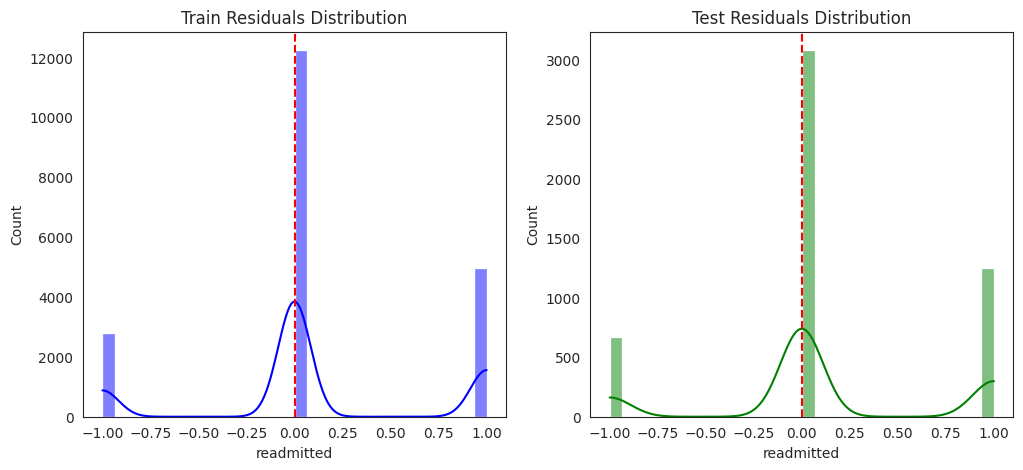

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.figure(figsize=(12, 5))

# Train Residuals
plt.subplot(1, 2, 1)
sns.histplot(train_residuals, kde=True, bins=30, color="blue")
plt.axvline(0, color='red', linestyle='dashed')  # Center line at 0
plt.title("Train Residuals Distribution")

# Test Residuals
plt.subplot(1, 2, 2)
sns.histplot(test_residuals, kde=True, bins=30, color="green")
plt.axvline(0, color='red', linestyle='dashed')
plt.title("Test Residuals Distribution")

plt.show()


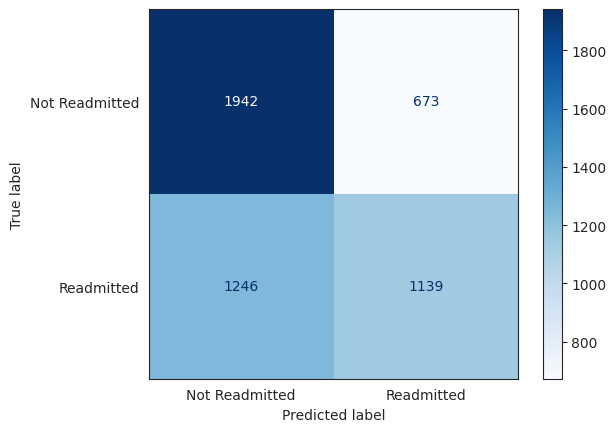

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Readmitted", "Readmitted"])
disp.plot(cmap="Blues")
plt.show()


In [10]:
from sklearn.metrics import precision_recall_curve, auc

# Get precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_test_probs)

# Compute PR-AUC
pr_auc = auc(recall, precision)

print(f"Precision-Recall AUC: {pr_auc:.4f}")


Precision-Recall AUC: 0.6278


In [11]:
from sklearn.metrics import confusion_matrix

# Get confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate Sensitivity & Specificity
sensitivity = tp / (tp + fn)  # Same as Recall
specificity = tn / (tn + fp)  # Ability to detect non-readmissions

print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


Sensitivity (Recall): 0.4776
Specificity: 0.7426


In [12]:
# Adjust threshold to 0.4 instead of 0.5
y_test_pred_adj = (y_test_probs >= 0.4).astype(int)

# Recalculate recall, precision, and F1
test_recall_adj = recall_score(y_test, y_test_pred_adj)
test_precision_adj = precision_score(y_test, y_test_pred_adj)
test_f1_adj = f1_score(y_test, y_test_pred_adj)

print(f" Adjusted Threshold (0.4): Precision: {test_precision_adj:.4f}, Recall: {test_recall_adj:.4f}, F1 Score: {test_f1_adj:.4f}")


 Adjusted Threshold (0.4): Precision: 0.5548, Recall: 0.7426, F1 Score: 0.6351


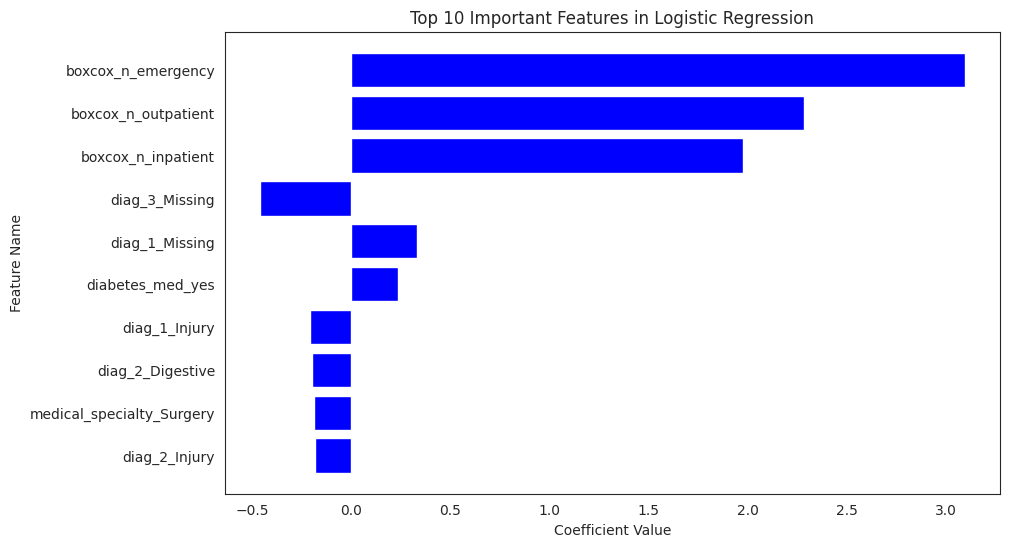

In [13]:
import numpy as np
import matplotlib.pyplot as plt

feature_names = X_train.columns
coefficients = model.coef_[0]

# Sort features by importance
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_features = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:10], sorted_coefficients[:10], color='blue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Top 10 Important Features in Logistic Regression")
plt.gca().invert_yaxis()  # Flip to show highest at top
plt.show()


              precision    recall  f1-score   support

           0       0.61      0.74      0.67      2615
           1       0.63      0.48      0.54      2385

    accuracy                           0.62      5000
   macro avg       0.62      0.61      0.61      5000
weighted avg       0.62      0.62      0.61      5000



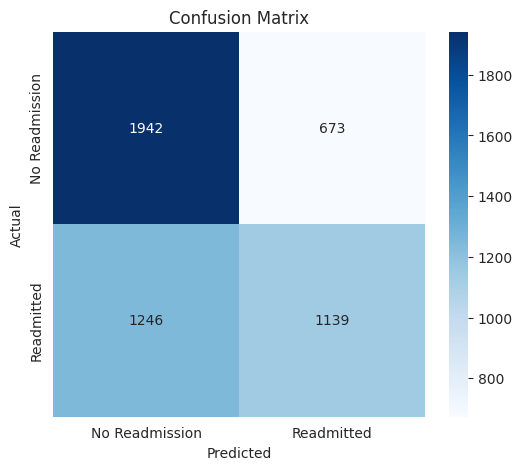

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Readmission", "Readmitted"], yticklabels=["No Readmission", "Readmitted"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [18]:
import joblib

# Save the trained model
joblib.dump(model, "output/readmission_predictor.pkl")


['output/readmission_predictor.pkl']